In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

In [2]:
# Load the data set
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.dtype

dtype('uint8')

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
# WE have change the shape of x from 28X28 to 28X28X1 and y unit to float

In [7]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [10]:
x_test.shape

(10000, 28, 28, 1)

In [11]:
#y_train = y_train.astype('float32')
#y_test = y_test.astype('float32')

In [12]:
y_train.dtype

dtype('uint8')

In [13]:
# Normalize the image

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train.shape

(60000,)

In [17]:
y_train = np_utils.to_categorical(y_train)

In [18]:
y_train.shape

(60000, 10)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
y_test = np_utils.to_categorical(y_test, 10)

In [21]:
# To build a cnn model

In [22]:
model = Sequential()
model.add(Conv2D(25, (3, 3), input_shape=(28, 28,1), strides=(1,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 25)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4225)              0         
                                                                 
 dense (Dense)               (None, 100)               422600    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 423,860
Trainable params: 423,860
Non-trainable params: 0
__________________________________________________

In [23]:
# compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [24]:
model.fit(x_train,y_train,batch_size=1000, epochs=8)

Epoch 1/8
60/60 [==============================] - 9s 139ms/step - loss: 0.5772 - accuracy: 0.8434
Epoch 2/8
60/60 [==============================] - 9s 146ms/step - loss: 0.2310 - accuracy: 0.9332
Epoch 3/8
60/60 [==============================] - 9s 157ms/step - loss: 0.1728 - accuracy: 0.9502
Epoch 4/8
60/60 [==============================] - 9s 156ms/step - loss: 0.1331 - accuracy: 0.9615
Epoch 5/8
60/60 [==============================] - 10s 160ms/step - loss: 0.1050 - accuracy: 0.9700
Epoch 6/8
60/60 [==============================] - 9s 158ms/step - loss: 0.0859 - accuracy: 0.9752
Epoch 7/8
60/60 [==============================] - 9s 158ms/step - loss: 0.0720 - accuracy: 0.9797
Epoch 8/8
60/60 [==============================] - 9s 156ms/step - loss: 0.0619 - accuracy: 0.9829


In [25]:
x_train.shape

(60000, 28, 28, 1)

In [26]:
x_test.shape

(10000, 28, 28, 1)

In [27]:
y_test.shape

(10000, 10)

In [28]:
y_test.dtype

dtype('float32')

In [29]:
y_train.shape

(60000, 10)

In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9789


[0.06996786594390869, 0.9789000153541565]

In [31]:
y_predict = model.predict(x_test)

In [32]:
y_predict

array([[1.5876416e-06, 1.1732821e-08, 9.4707475e-06, ..., 9.9971777e-01,
        4.9948784e-07, 9.2719911e-06],
       [2.6462801e-06, 1.7571214e-04, 9.9949384e-01, ..., 1.6862576e-11,
        2.4287374e-05, 2.8162117e-10],
       [1.7908967e-05, 9.9819165e-01, 1.8225556e-04, ..., 1.1368118e-03,
        1.3396904e-04, 4.3426130e-06],
       ...,
       [1.9646686e-08, 2.4179287e-09, 1.9612953e-08, ..., 3.6257177e-05,
        3.0544623e-05, 3.4849587e-04],
       [1.6440400e-07, 2.8387942e-07, 2.3028510e-07, ..., 7.0305867e-07,
        9.6868403e-04, 2.5018463e-07],
       [1.7007429e-06, 1.9990094e-10, 1.3199682e-05, ..., 3.9915009e-09,
        3.8406893e-06, 6.4788118e-08]], dtype=float32)

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
y_test_labels = [np.argmax(w) for w in y_test]
y_test_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
y_test_labels[1012]

7

In [36]:
y_predicted_labels[1012]

7

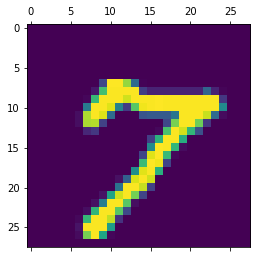

In [37]:
plt.matshow(x_test[9000])

In [38]:
y_test_labels[9000]

7

In [39]:
y_predicted_labels[9000]

7

In [40]:
cm = confusion_matrix(y_test_labels,y_predicted_labels)
cm

array([[ 970,    0,    1,    1,    0,    3,    1,    3,    1,    0],
       [   0, 1130,    2,    0,    0,    1,    2,    0,    0,    0],
       [   3,    5, 1003,    3,    2,    0,    3,    6,    6,    1],
       [   0,    0,    1,  995,    0,    2,    1,    5,    2,    4],
       [   0,    0,    1,    0,  968,    0,    5,    0,    2,    6],
       [   2,    0,    0,    6,    2,  870,    7,    0,    3,    2],
       [   7,    2,    1,    1,    5,    4,  936,    0,    2,    0],
       [   0,    4,   12,    0,    2,    1,    0, 1002,    1,    6],
       [   4,    0,    3,    8,    6,    1,    1,    4,  943,    4],
       [   4,    2,    0,    6,   15,    3,    0,    4,    3,  972]],
      dtype=int64)

Text(69.0, 0.5, 'Truth')

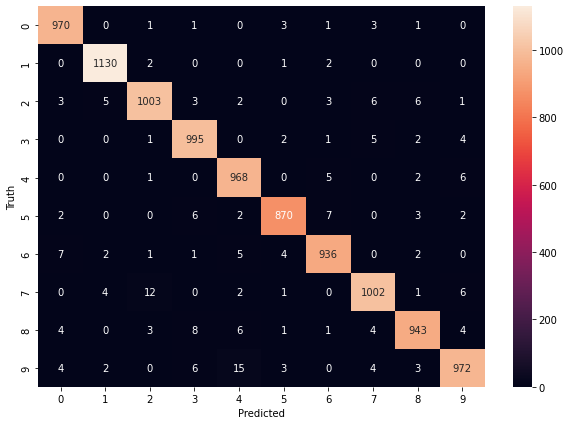

In [42]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')